In [ ]:
import pandas as pd

# import file
bls_df = pd.read_csv(
    r"C:\Users\13605\US-Grocery-Price-Patterns\cleaned_data\cleaned_bls_data.csv"
)

bls_df.head()



,area_code,area_name,series_id,item_code,year,value,item_name
0,0,U.S. city average,APU0000701111,701111,1980.0,0.203,"Flour, white, all purpose, per lb. (453.6 gm)"
1,0,U.S. city average,APU0000701111,701111,1980.0,0.205,"Flour, white, all purpose, per lb. (453.6 gm)"
2,0,U.S. city average,APU0000701111,701111,1980.0,0.211,"Flour, white, all purpose, per lb. (453.6 gm)"
3,0,U.S. city average,APU0000701111,701111,1980.0,0.206,"Flour, white, all purpose, per lb. (453.6 gm)"
4,0,U.S. city average,APU0000701111,701111,1980.0,0.207,"Flour, white, all purpose, per lb. (453.6 gm)"


In [ ]:
df = bls_df.copy()


df["year"] = df["year"].astype(int)

df["is_post_2020"] = (df["year"] >= 2020).astype(int)

df[["area_name", "item_name", "year", "value"]].head()


,area_name,item_name,year,value
0,U.S. city average,"Flour, white, all purpose, per lb. (453.6 gm)",1980,0.203
1,U.S. city average,"Flour, white, all purpose, per lb. (453.6 gm)",1980,0.205
2,U.S. city average,"Flour, white, all purpose, per lb. (453.6 gm)",1980,0.211
3,U.S. city average,"Flour, white, all purpose, per lb. (453.6 gm)",1980,0.206
4,U.S. city average,"Flour, white, all purpose, per lb. (453.6 gm)",1980,0.207


In [ ]:
# Linear Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# df = your BLS dataframe with features already added
df = bls_df.copy()
df["year"] = df["year"].astype(int)
df["is_post_2020"] = (df["year"] >= 2020).astype(int)



# Using these columns to predict the price
# - area_name
# - item_name
# - year
# - is_post_2020


features = [
    "area_name",      
    "item_name",     
    "year",          
    "is_post_2020"   
]

X = df[features]
y = df["value"]      

# Categorical variables

categorical_cols = ["area_name", "item_name"]
numeric_cols = ["year", "is_post_2020"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)


# Train and test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


#Fit the  model

model = LinearRegression()

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model.fit(X_train_transformed, y_train)


y_pred = model.predict(X_test_transformed)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# get coefficients

cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols).tolist()
feature_names = cat_feature_names + numeric_cols

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df.head(20)


R²: 0.8939695267892775
RMSE: 0.6583141038880648


,feature,coefficient
49,"item_name_Coffee, freeze dried, regular, all s...",11.143371
47,"item_name_Coffee, freeze dried, decaf., all si...",11.003259
48,"item_name_Coffee, freeze dried, plain, 3.1-9 o...",9.576752
53,"item_name_Coffee, instant, plain, regular, all...",8.269996
145,"item_name_Vodka, all types, all sizes, any ori...",8.144335
50,"item_name_Coffee, instant, plain, 3.1-6 ounce ...",7.501215
147,"item_name_Wine, red and white table, all sizes...",6.842085
52,"item_name_Coffee, instant, plain, regular, 6.1...",6.464265
22,"item_name_Bourbon whiskey, 375 ml-1.75 liter (...",5.868683
51,"item_name_Coffee, instant, plain, 9.1-14 ounce...",5.697254


<Axes: xlabel='feature'>

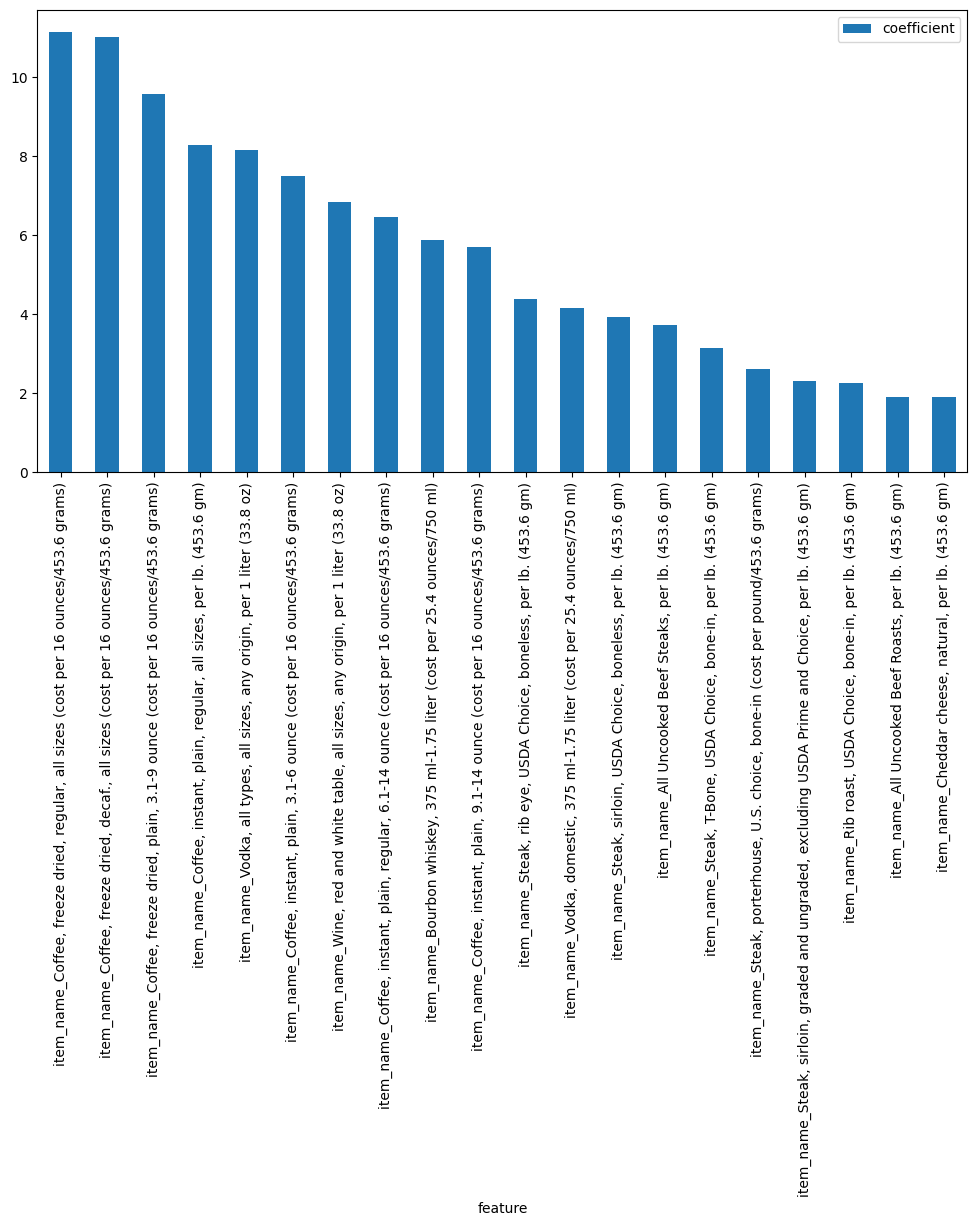

In [12]:
coef_df.head(20).plot.bar(x="feature", y="coefficient", figsize=(12,6))


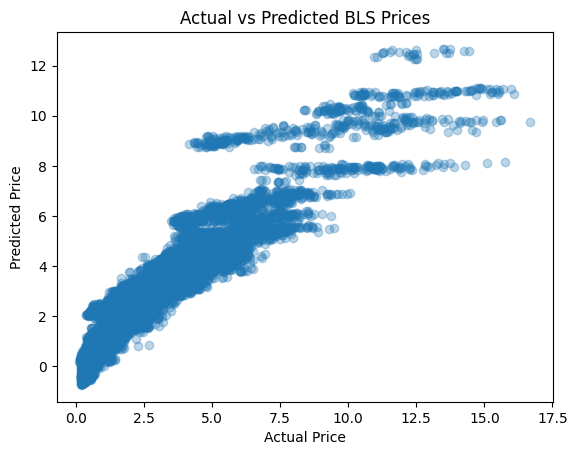

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted BLS Prices")
plt.show()
